In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
# 데이터 불러오기
df = pd.read_csv('superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [29]:
# data 칼럼 날짜 형식 변환
df['Date2'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') # 'Date2' 칼럼 새로 생성

# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')

# 연도 칼럼 설정
df['Year'] = df['Date2'].dt.year # 'Year' 칼럼 새로 생성
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Date2,Year
7980,7981,CA-2015-103800,03/01/2015,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015-01-03,2015
741,742,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015-01-04,2015
740,741,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015-01-04,2015
739,740,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015-01-04,2015
1759,1760,CA-2015-141817,05/01/2015,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015-01-05,2015


In [39]:
## 선그래프용 데이터셋 생성
# 2018년 데이터만 필터링
df_line = df[df.Year == 2018]
# 2018년 일별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()

,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


In [45]:
# 30일 이동평균 생성
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()
df_line

,Date2,Sales,Month
0,2018-01-01,1481.8280,NaN
1,2018-01-02,2079.5540,NaN
2,2018-01-03,2070.2720,NaN
3,2018-01-06,33.7400,NaN
4,2018-01-07,3395.5900,NaN
...,...,...,...
317,2018-12-26,814.5940,3276.087267
318,2018-12-27,177.6360,3113.736067
319,2018-12-28,1657.3508,3115.039293
320,2018-12-29,2915.5340,2981.792293


<Axes: xlabel='Date2'>

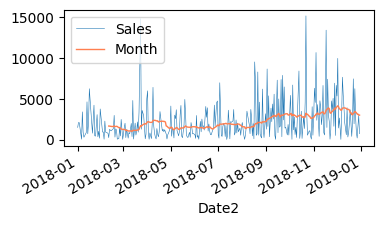

In [61]:
# 선그래프 시각화 # axes: ㄱ림 내에 데이터를 그리는 영역
ax = df_line.plot(x='Date2', y='Sales', linewidth = '0.4', figsize=(4,2))
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth = '1', ax=ax)
# 매출액 편차가 커서 매출 선으로는 전체적인 추이를 가늠하기 힘들 때 이동평균선이 도움됨
# => 5월부터 매출이 감소했다가 8월부터 상승하는 것 확인 가능

In [53]:
# 연도별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()
df_bar_1

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


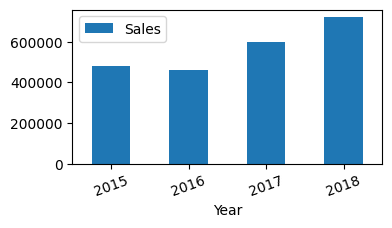

In [60]:
# 연도별 매출액 막대그래프 시각화
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=20, figsize=(4,2))
# rot: 레이블의 회전각도

In [64]:
# 연도별, 고객 세그먼트별 매출액 데이터 가공
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()
df_bar_2

,Year,Segment,Sales
0,2015,Consumer,262956.8006
1,2015,Corporate,127797.4957
2,2015,Home Office,89101.9118
3,2016,Consumer,265356.2933
4,2016,Corporate,119675.5989
5,2016,Home Office,74404.1132
6,2017,Consumer,291142.9652
7,2017,Corporate,204977.3178
8,2017,Home Office,104072.2670
9,2018,Consumer,328604.4719


In [68]:
# 고객 세그먼트를 칼럼으로 피벗 !!!!!신기하다 멋지다!!!!
df_bar_2_pv = df_bar_2.pivot(index='Year',
                             columns='Segment',
                             values='Sales').reset_index()
df_bar_2_pv

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<Axes: xlabel='Year'>

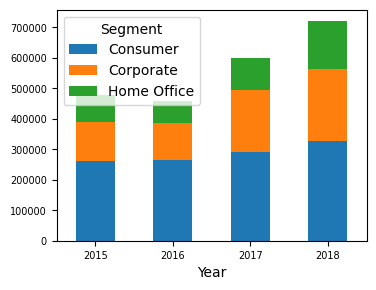

In [80]:
# 연도별 고객 세그먼트별 매출액 누적 막대그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=True, rot=0, fontsize = 7, figsize=(4,3))